# **Анализ статистики чемпионатов мира по футболу**

## **Цель проекта** - проанализировать дата сета по всем голам со всех чемпионатов мира по футболу, выявить несколько интересных статистических фактов и проверить гипотезу

### Исходный дата сет *fifa_wc_data.csv* содержит информацию по каждому голу, забитому на чемпионатах мира по футболу с 1930 по 2022. Он содержит следующие колонки:


*   key_id - уникальный идентификатор записи
*   goal_id - уникальный идентификатор голов
*   tournament_id - идентификатор турнира
*   tournament_name - название турнира
*   match_id - идентификатор матча
*   match_name - название матча
*   match_date - дата матча
*   stage_name - название стадии турнира (групповая, финальная)
*   group_name - номер группы (not applicable в случае стадии плей-офф)
*   team_id - идентификатор команды (национальной сборной)
*   team_name - название команды
*   team_code - аббривеатура команды по стандартам FIFA
*   home_team - 1 в случае, если гол забит домашней командой, 0 иначе
*   away_team - 1 в случае, если гол забит гостевой командой, 0 иначе
*   player_id - идентификатор игрока, забившего гол
*   family_name - фамилия игрока
*   given_name - имя игрока
*   shirt_number - игровой номер
*   player_team_id - идентификатор команды, за которую игрок забил гол
*   player_team_name - название команды, за которую играет забивший гол игрок
*   player_team_code - аббривеатура команды по стандартам FIFA, за которую игрко забил гол
*   minute_label - минута, на которой был забит гол
*   minute_regulation - минута, на которой был забит гол в числовом значении
*   minute_stoppage - добавленное время
*   match_period - тайм матча, на которой был забит гол
*   own_goal - 1 в случае автогола, 0 иначе
*   penalty - 1 в случае, если гол забит с пенальти, 0 иначе




Импортируем нужные нам библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

Считаем наш csv файл. Так как формат не UTF-8, а latin, поменяем стандартное значение encoding на latin-1

In [3]:
df = pd.read_csv('fifa_wc_data.csv', encoding='latin-1')

Проверим, что считали все правильно, посмотрим на последние 10 записей из дата сета

In [4]:
df.tail(10)

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,...,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
2710,2711,G-2711,WC-2022,2022 FIFA World Cup,M-2022-62,France v Morocco,12/14/2022,semi-finals,not applicable,T-28,...,12,T-28,France,FRA,79',79,0,second half,0,0
2711,2712,G-2712,WC-2022,2022 FIFA World Cup,M-2022-63,Croatia v Morocco,12/17/2022,third-place match,not applicable,T-17,...,20,T-17,Croatia,HRV,7',7,0,first half,0,0
2712,2713,G-2713,WC-2022,2022 FIFA World Cup,M-2022-63,Croatia v Morocco,12/17/2022,third-place match,not applicable,T-45,...,20,T-45,Morocco,MAR,9',9,0,first half,0,0
2713,2714,G-2714,WC-2022,2022 FIFA World Cup,M-2022-63,Croatia v Morocco,12/17/2022,third-place match,not applicable,T-17,...,18,T-17,Croatia,HRV,42',42,0,first half,0,0
2714,2715,G-2715,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-03,...,10,T-03,Argentina,ARG,23',23,0,first half,0,1
2715,2716,G-2716,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-03,...,11,T-03,Argentina,ARG,36',36,0,first half,0,0
2716,2717,G-2717,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-28,...,10,T-28,France,FRA,80',80,0,second half,0,1
2717,2718,G-2718,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-28,...,10,T-28,France,FRA,81',81,0,second half,0,0
2718,2719,G-2719,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-03,...,10,T-03,Argentina,ARG,108',108,0,"extra time, second half",0,0
2719,2720,G-2720,WC-2022,2022 FIFA World Cup,M-2022-64,Argentina v France,12/18/2022,final,not applicable,T-28,...,10,T-28,France,FRA,118',118,0,"extra time, second half",0,1


Тут как раз записи с последнего чемпионата мира. В последних 6 мы видим данные по легендарному финалу между Аргентиной и Францией

Посмортим, сколько у нас всего записей

In [5]:
df.shape

(2720, 27)

Всего на чемпионатах мира было забито 2720 гола и мы имеем 27 различных статистических показателей по этим голам
###Давайте найдем несколько интресеных фактов про чемпионаты мира. Начнем с "топ лучших"

## Топ 10 команд по голам

Для начал посмотрим на все уникальные названия команд

In [6]:
df['team_name'].unique()

array(['France', 'Mexico', 'United States', 'Yugoslavia', 'Brazil',
       'Romania', 'Peru', 'Argentina', 'Chile', 'Uruguay', 'Paraguay',
       'Austria', 'Czechoslovakia', 'Germany', 'Belgium', 'Hungary',
       'Egypt', 'Italy', 'Spain', 'Sweden', 'Switzerland', 'Netherlands',
       'Cuba', 'Norway', 'Poland', 'England', 'Turkey', 'West Germany',
       'Northern Ireland', 'Scotland', 'Wales', 'Soviet Union',
       'Colombia', 'Bulgaria', 'Portugal', 'North Korea', 'Morocco',
       'Israel', 'East Germany', 'Haiti', 'Tunisia', 'Iran',
       'El Salvador', 'New Zealand', 'Algeria', 'Honduras', 'Kuwait',
       'Cameroon', 'South Korea', 'Denmark', 'Iraq', 'Costa Rica',
       'Republic of Ireland', 'United Arab Emirates', 'Saudi Arabia',
       'Nigeria', 'Russia', 'Bolivia', 'Croatia', 'Jamaica',
       'South Africa', 'Japan', 'Senegal', 'Slovenia', 'Ecuador',
       'Ivory Coast', 'Australia', 'Czech Republic', 'Togo', 'Ghana',
       'Ukraine', 'Angola', 'Serbia and Monteneg

Чемпионаты мира проводятся уже практически целый век, поэтому некоторые сборные переименовывались в связи с политическими причинами. Здесь мы можем видеть, что сборная Германии представляется в трех видах в разное время: восточная Германия, западная Германия и Германия (наше время). Давайте переименуем восточную и северную Германию в Германию в полях 'player_team_name' и 'team_name'

In [7]:
df['player_team_name'] = df['player_team_name'].apply(lambda x: 'Germany' if x == 'East Germany' or x == 'West Germany' else x)
df['team_name'] = df['team_name'].apply(lambda x: 'Germany' if x == 'East Germany' or x == 'West Germany' else x)

Чтобы найти информацию по топ 10 сборным по голам сгруппируем данные по 'player_team_name', добавим аггрегацию count и переименуем колонки, а затем отсортируем от большего к меньшему

In [8]:
team_goals_all_time = df.groupby('player_team_name', as_index=False).agg({'goal_id': 'count'}).rename(columns={'goal_id':'total_goals', 'player_team_name': 'team_name'})
team_goals_all_time = team_goals_all_time.sort_values(by='total_goals', ascending=False)

Возьмем топ 10

In [9]:
top_10_team_goals = team_goals_all_time.head(10)
top_10_team_goals

,team_name,total_goals
8,Brazil,238
25,Germany,233
2,Argentina,152
24,France,130
35,Italy,125
67,Spain,108
23,England,103
42,Netherlands,97
77,Uruguay,89
30,Hungary,86


Давайте теперь визуалицируем наши данные. Для сравнения количества голов лучше всего подойдет столбчатая диаграмма. Будем использовать barplot из seaborn

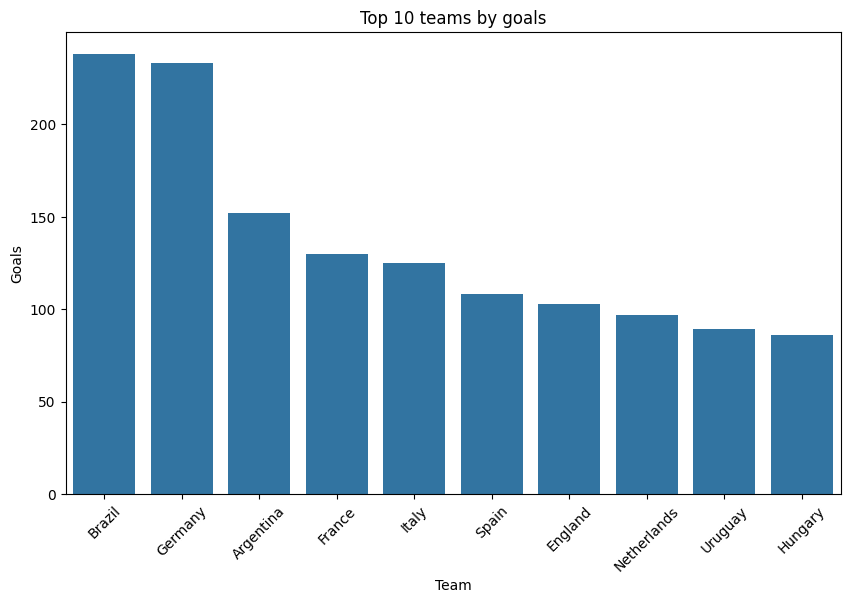

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='team_name', y='total_goals', data=top_10_team_goals)
plt.title('Top 10 teams by goals')
plt.xlabel('Team')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()

По графику можем увидеть, что больше всех голов у сборной Бразилии - самой титулованной сборной в истории, которая славится своим атакующим и виртуозным футболом. На втором месте с небольшим отставанием сборная Германии, а на третьем действующий чемпион мира - сборная Аргентины

## Топ 10 игроков по голам

Перед тем, как группировать данные, нам нужно немного изменить наши данные, так как у некоторых игроков в поле 'given_name' стоит значение not applicable. Создадим поле 'name_surname', где будет хранится имя и фамилия игрока. В случае отстуствия имени оставим только фамилию

In [11]:
df['name_surname'] = df.apply(lambda x: x['family_name'] if x['given_name'] == 'not applicable' else x['given_name'] + ' ' + x['family_name'], axis=1)

Повторим те же операции, как в топ 10 по голам, но теперь с группировкой по 'name_surname'

In [12]:
players_goals_data = df.groupby('name_surname', as_index=False).agg({'goal_id': 'count'}).rename(columns={'goal_id':'total_goals'})
players_goals_data = players_goals_data.sort_values(by='total_goals', ascending=False)
to_10_players_by_goals = players_goals_data.head(10)

In [13]:
to_10_players_by_goals

,name_surname,total_goals
946,Miroslav Klose,16
1179,Ronaldo,15
454,Gerd Müller,14
812,Lionel Messi,13
737,Just Fontaine,13
792,Kylian Mbappé,12
1047,Pelé,12
745,Jürgen Klinsmann,11
1278,Sándor Kocsis,11
432,Gabriel Batistuta,10


Визуализируем результаты также с помощью barplot

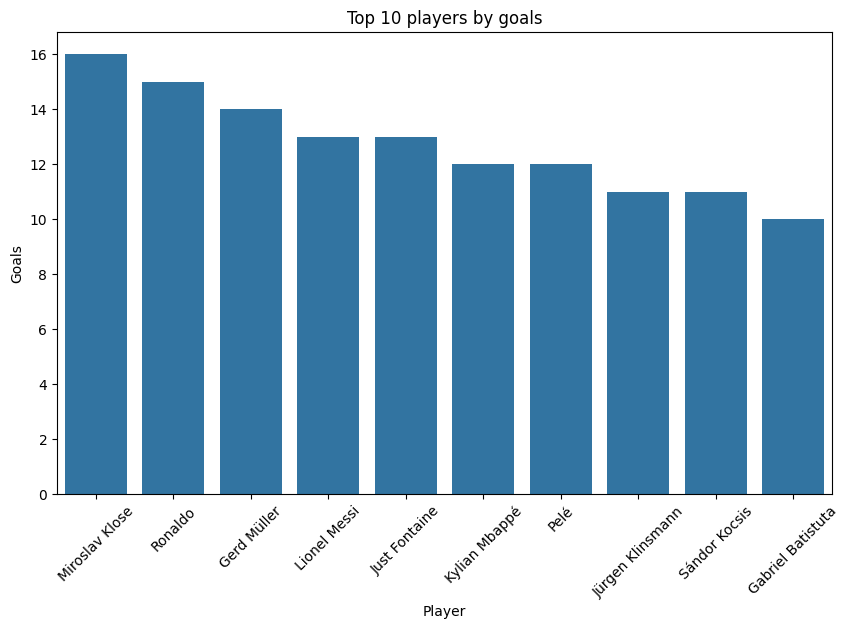

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name_surname', y='total_goals', data=to_10_players_by_goals)
plt.title('Top 10 players by goals')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()

Первое место занимает Мирослав Клозе, который побил рекорд на чепионате мира в 2014 году, получив титул в том году и забив в общей слодности на всех турнирах 16 голов. Далее идет обладатель двух золотых мячей "зубастик" Роналдо из сборной Бразилии, который взял титул 2 раза в 1994 и 2002 и забил в общей сложности 15 голов. На третьем месте Герд Мюллер, игркок сборной Германии, который считается один из лучших игроков 20 века, забивший 14 голов

## Лучшие бомбардиры каждого розыгрыша

Чтобы найти лучего бомбардира кажого розыгрыша сначала нужно сгруппировать данные по названию турнира и по имени_фамилии игрока.

In [15]:
players_goals_by_tournament = df.groupby(['tournament_name', 'name_surname'], as_index=False).agg({'goal_id':'count'}).rename(columns={'goal_id': 'total_goals'})

Далее сделаем группировку по туринру и выберем игрока с самым большим количеством голов

In [16]:
best_scorers = players_goals_by_tournament.groupby('tournament_name').apply(lambda x: x.loc[x['total_goals'].idxmax()])
best_scorers.reset_index(drop=True, inplace=True)

Визуализируем получившийся результат. Название туринра слишком громоздкое, поэтому возьмем из него только год. Создадим новую колонку, где запишем имя_фамилия игрока и год турнира

In [17]:
best_scorers['player_plus_tournament'] = best_scorers['name_surname'] + ' ' + best_scorers['tournament_name'].str.extract('(\d{4})')[0]

Теперь выведем стобчтаю диаграмму

<ipython-input-18-b9198e4def84>:8: UserWarning: Glyph 158 (\x9e) missing from current font.
  plt.tight_layout()
<ipython-input-18-b9198e4def84>:8: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 158 (\x9e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


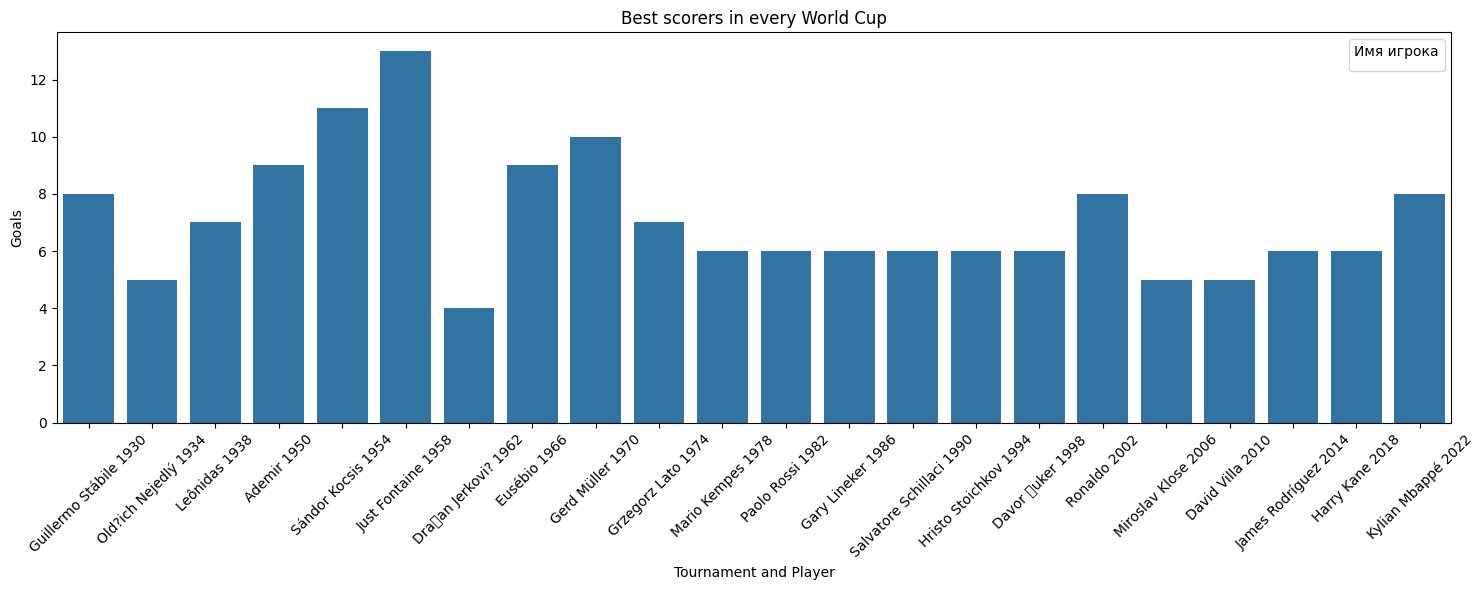

In [18]:
plt.figure(figsize=(15, 6))
sns.barplot(x='player_plus_tournament', y='total_goals', data=best_scorers)
plt.title('Best scorers in every World Cup')
plt.xlabel('Tournament and Player')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.legend(title='Имя игрока')
plt.tight_layout()
plt.show()

На последних трех чемпионатах лучшими бомбардирами были Киллиан Мбаппе (2022), Гарри Кейн (2018) и Хамес Родригес (2014). Сильно выбивается из общего списка чемпионат мира 1958 года, на котором французский футболист Джаст Фонтейн забил целых 13 голов!

## Распределение голов по минутам

Как распределяются голы с течением времени матча в основное время? Давайте построим это распределение. Для начала отберем записи голов, которые были забиты до 90 минуты и вне добавленного времени.

In [19]:
goals_under_90_mins = df[(df['minute_regulation'] <= 90) & (df['minute_stoppage'] == 0)]

Сгруппируем минуты и посчитаем сколько голов было забито на каждой

In [20]:
counter_minutes = goals_under_90_mins.groupby('minute_regulation', as_index=False).agg({'goal_id':'count'}).rename(columns={'minute_regulation': 'minute', 'goal_id': 'total_goals'})

Теперь давайте сгруппируем минуты по 5 минут на интервал и построим barplot

In [21]:
counter_minutes['minute_interval'] = pd.cut(counter_minutes['minute'], bins=range(1, 92, 5), right=False, labels=[f'{i}-{i+4}' for i in range(1, 90, 5)])
interval_minutes = counter_minutes.groupby('minute_interval')['total_goals'].sum().reset_index()

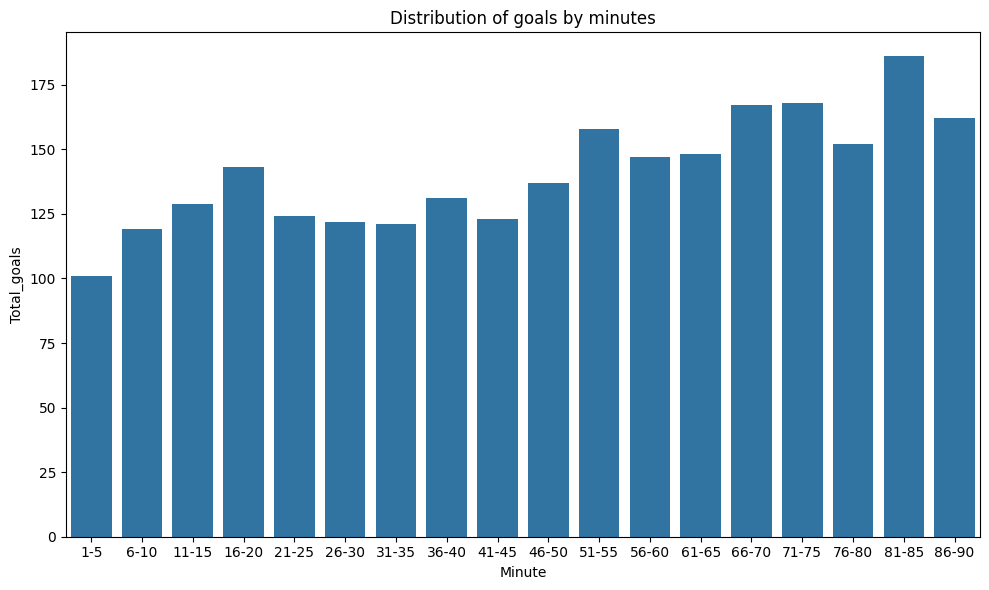

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='minute_interval', y='total_goals', data=interval_minutes)
plt.title('Distribution of goals by minutes')
plt.xlabel('Minute')
plt.ylabel('Total_goals')
plt.tight_layout()
plt.show()

По этому распредлению мы можем увидеть, что чем ближе минута к концу игры, тем больше забитых мячей. Своего пика распредление достигает примерно на 81-85 минутах. Этот вывод выглядит логичным, потому что к концу игры игроки больше мотивированны забить гол, чтобы спасти свою команду отпоражения

## Сколько голов было забито с игры и с пенальти?

Чтобы ответить на этот вопрос построим круговую диаграмму. Для этого сгруппируем датасет по столбцу 'peanlty' и создадим столбец 'goal_type'

In [23]:
penalty_or_from_game =  df.groupby('penalty', as_index=False).agg({'goal_id': 'count'}).rename(columns={'goal_id': 'total_goals'})

In [24]:
penalty_or_from_game['goal_type'] = penalty_or_from_game.apply(lambda x: 'From penalty' if x['penalty'] == 1 else 'From game', axis=1)

(-1.099999789994301, 1.099999989742702, -1.0999998128521162, 1.099999991088196)

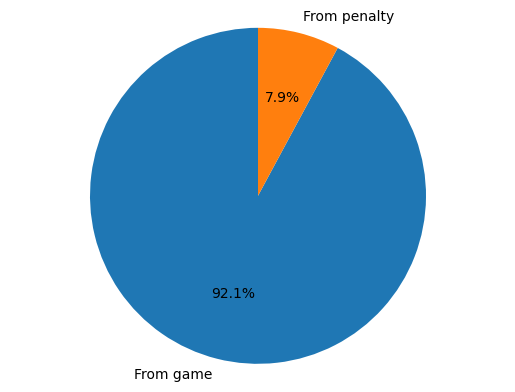

In [25]:
fig, ax = plt.subplots()
ax.pie(penalty_or_from_game['total_goals'], labels=penalty_or_from_game['goal_type'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')

## Топ 5 самых зрелищных игр

Чемпионат мира - очень важное событие в футболе. Игроки защищают честь своей страны, поэтому команды в среднем действуют более аккуратно, чем в клубном футболе. Из-за этого количество мячей забитых в играх меньше. Однако есть матчи, которые обладают аномальной результативностью. Например, многие помнят разгром Бразилии, который устроила сборная Германии на ЧМ 2014. Счет в матче тогда был 7:1. А самая ли это результативная игра в истории чемпионатов мира? Давайте найдем топ 5 самых результативных игр в истории розыгрыша

Для начала сгруппируем датасет по 'mathc_id'. Аггрегируем количество записей в столбец 'total_goals' и посчитаем сколько забила домашняя и гостевая команды

In [26]:
goals_in_matches = df.groupby('match_id', as_index=False).agg({'goal_id': 'count', 'home_team': 'sum', 'away_team': 'sum'}).rename(columns={'goal_id': 'total_goals'})

Нам также понадобятся названия игр. Созадим дата фрейм с уникальными id матечей, рядом с которыми поставим названия этих матчей

In [27]:
matches_teams_data = df[['match_id', 'match_name']].drop_duplicates(subset=['match_id'])

Теперь смерджим таблицы с названием и результатами

In [28]:
goals_in_matches = pd.merge(goals_in_matches, matches_teams_data, on='match_id')

Отсортируем получившийся резуьтат по количеству мячей

In [29]:
goals_in_matches = goals_in_matches.sort_values(by='total_goals', ascending=False)

Для визуализации полученного результата создадим колонку, где укажем название матча и счет

In [30]:
goals_in_matches['match_result'] = goals_in_matches['match_name'] + ' ' + goals_in_matches['home_team'].astype(str) + ':' + goals_in_matches['away_team'].astype(str)

Отберем топ 5 и построим столбчатую диаграмму

In [31]:
top_5_most_resultant_games = goals_in_matches.head(5)

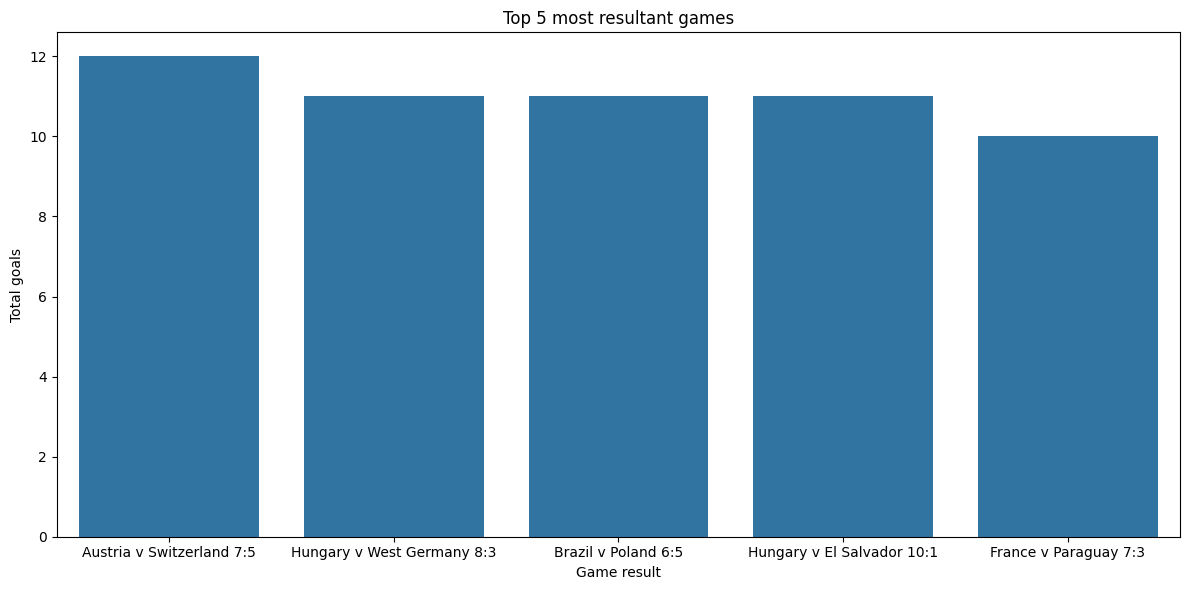

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='match_result', y='total_goals', data=top_5_most_resultant_games)
plt.title('Top 5 most resultant games')
plt.xlabel('Game result')
plt.ylabel('Total goals')
plt.tight_layout()
plt.show()

Матч Бразилия - Германия даже не вошел в топ 5! В самой результативной игре Австрия - Швейцария команды забили в общей сложности 12 мячей.

А Бразилия - Германия находится лишь на 17 месте

In [33]:
goals_in_matches.head(20)

,match_id,total_goals,home_team,away_team,match_name,match_result
93,M-1954-19,12,7,5,Austria v Switzerland,Austria v Switzerland 7:5
87,M-1954-13,11,8,3,Hungary v West Germany,Hungary v West Germany 8:3
40,M-1938-06,11,6,5,Brazil v Poland,Brazil v Poland 6:5
287,M-1982-05,11,10,1,Hungary v El Salvador,Hungary v El Salvador 10:1
104,M-1958-04,10,7,3,France v Paraguay,France v Paraguay 7:3
132,M-1958-34,9,6,3,France v West Germany,France v West Germany 6:3
228,M-1974-12,9,9,0,Yugoslavia v Zaire,Yugoslavia v Zaire 9:0
10,M-1930-11,9,6,3,Argentina v Mexico,Argentina v Mexico 6:3
80,M-1954-06,9,9,0,Hungary v South Korea,Hungary v South Korea 9:0
91,M-1954-17,9,7,2,West Germany v Turkey,West Germany v Turkey 7:2


## Стал ли футбол "скучнее" в 21 веке?

Существует мнение о том, что футбол в 21 веке стал "скучнее". Матчи не такие зрелещные, команды играют в удержание и меньше атакуют. Но так ли это на самом деле? Давайте проверим.

Посмотрим на распредление количества голов на каждом чемпионате мира. Сгруппируем все голы по названию турина и аггрегируем количество голов.

In [34]:
goals_on_every_wc = df.groupby('tournament_name', as_index=False).agg({'goal_id': 'count'}).rename(columns={'goal_id': 'total_goals'})

Создадим колонку 'year', где будет хранится год проведения чемпионата и построим линейный график

In [35]:
goals_on_every_wc['year'] = goals_on_every_wc['tournament_name'].str.extract('(\d{4})')[0]

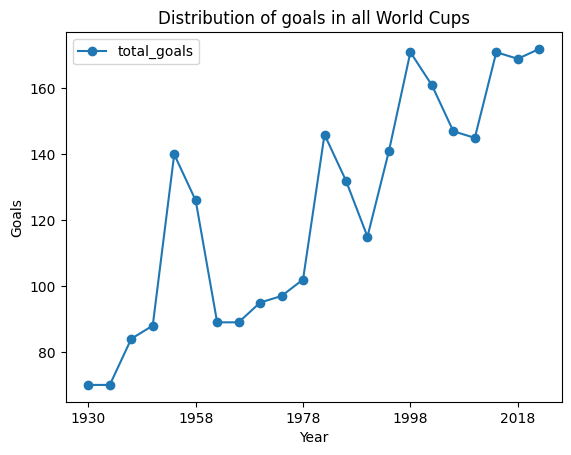

In [36]:
goals_on_every_wc.plot(x='year', y='total_goals', marker='o', linestyle='-')
plt.title('Distribution of goals in all World Cups')
plt.xlabel('Year')
plt.ylabel('Goals')
plt.show()

Кажется, что результат обратно противоположный. С течением времени количество голов на ЧМ увеличивается, это хорошо видно на графике. Однако, здесь не учитывается то, что формат турнира менялся с течением времени. Так в самом первом турнире в 1930 году было сыграно всего лишь 18 матчей, а на последнем в 2022 году целых 64.

### Проверка гипотезы

Для того, чтобы проверить нашу гипотезу нужно сначала ее сформировать. Будем испольщовать среднее количество голов забитое за матч в 20 и 21 веке. Итак, наши гипотезы будут выглядеть так.

**H0 - среднее количество голов, забитое за матч в 20 и 21 веке равны**

**H1 - среднее количество голов, забитое за матч в 20 и 21 веке имеют статистически значимое отличие**

На этом этапе возникает еще одна проблема: в наш дата сет записаны только голы. В нем нет матчей, в которых не было забито ни одного мяча. Но у нас есть другой дата сет, в котором записаны результаты всех матчей без подробной статистики. Но в данном исследовании она и не нужна. Нас интрересует только количество голов и количество матчей. Для этой задачи он подойдет идеально.

Загрузим наш дата сет

In [37]:
wc_matches = pd.read_csv('wc_matches.csv')

In [38]:
wc_matches.head(10)

,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek
0,1930,Uruguay,Montevideo,Group 1,France,Mexico,4,1,H,NaN,France,Mexico,1930-07-13,Jul,Sunday
1,1930,Uruguay,Montevideo,Group 4,Belgium,United States,0,3,A,NaN,United States,Belgium,1930-07-13,Jul,Sunday
2,1930,Uruguay,Montevideo,Group 2,Brazil,Yugoslavia,1,2,A,NaN,Yugoslavia,Brazil,1930-07-14,Jul,Monday
3,1930,Uruguay,Montevideo,Group 3,Peru,Romania,1,3,A,NaN,Romania,Peru,1930-07-14,Jul,Monday
4,1930,Uruguay,Montevideo,Group 1,Argentina,France,1,0,H,NaN,Argentina,France,1930-07-15,Jul,Tuesday
5,1930,Uruguay,Montevideo,Group 1,Chile,Mexico,3,0,H,NaN,Chile,Mexico,1930-07-16,Jul,Wednesday
6,1930,Uruguay,Montevideo,Group 2,Bolivia,Yugoslavia,0,4,A,NaN,Yugoslavia,Bolivia,1930-07-17,Jul,Thursday
7,1930,Uruguay,Montevideo,Group 4,Paraguay,United States,0,3,A,NaN,United States,Paraguay,1930-07-17,Jul,Thursday
8,1930,Uruguay,Montevideo,Group 3,Uruguay,Peru,1,0,H,NaN,Uruguay,Peru,1930-07-18,Jul,Friday
9,1930,Uruguay,Montevideo,Group 1,Argentina,Mexico,6,3,H,NaN,Argentina,Mexico,1930-07-19,Jul,Saturday


Создадим 2 дата сета, в которых будет хранится нужная нам информация по матчам (year, home_score, away_score) для 20 и 21 века.

In [39]:
matches_21_century = wc_matches[wc_matches['year'] > 2000][['year', 'home_score', 'away_score']]
matches_20_century = wc_matches[wc_matches['year'] < 2000][['year', 'home_score', 'away_score']]

Создадим колонку goals, в которой будем хранить количество мячей в матче

In [40]:
matches_21_century['goals'] = matches_21_century['home_score'] + matches_21_century['away_score']
matches_20_century['goals'] = matches_20_century['home_score'] + matches_20_century['away_score']

Для того, чтобы проверить гипотезу о равенстве двух средних нам нужно выбрать статистический тест. Чтобы его выбрать проверим наши выборки на нормальность распредления и выбросы

Построим гистограммы частот для количества голов в каждой категории

In [46]:
value_counts_21 = matches_21_century['goals'].value_counts().sort_index()
value_counts_20 = matches_20_century['goals'].value_counts().sort_index()

Text(0, 0.5, 'Frequency')

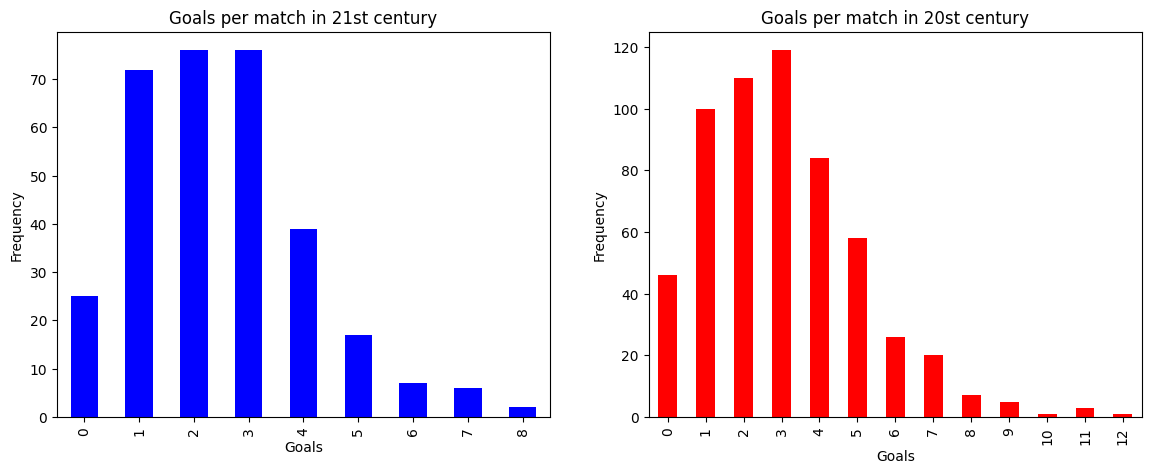

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

value_counts_21.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Goals per match in 21st century')
ax[0].set_xlabel('Goals')
ax[0].set_ylabel('Frequency')

value_counts_20.plot(kind='bar', ax=ax[1], color='red')
ax[1].set_title('Goals per match in 20st century')
ax[1].set_xlabel('Goals')
ax[1].set_ylabel('Frequency')

По графику можно предположить, что наши распредления не является нормальными, но их форма одинкаовая со скосом вправо. Проверим на выбросы с помощью box-plot

Text(0, 0.5, 'Goals')

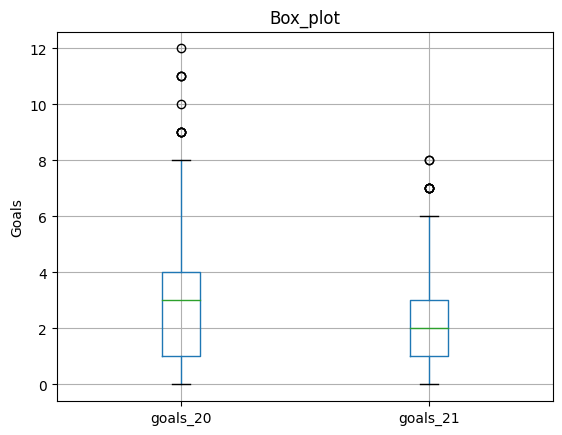

In [50]:
goals_20_21 = pd.DataFrame({'goals_20': matches_20_century['goals'], 'goals_21': matches_21_century['goals']})
goals_20_21.boxplot(column=['goals_20', 'goals_21'])
plt.title('Box_plot')
plt.ylabel('Goals')

Box-plot показывает, что наши данные имеют выбросы. В данных по 20 веку их больше

Давайте проверим каждую выборку на нормальность распределения с помощью теста Шапиро-Уитни. Зададим уровень значимости 0.05

In [51]:
stat_21, p_21 = shapiro(matches_21_century['goals'])
stat_20, p_20 = shapiro(matches_20_century['goals'])

In [52]:
p_21

2.1687202381159842e-11

In [53]:
p_21 > 0.05

False

In [54]:
p_20

5.739549248945527e-16

In [55]:
p_20 > 0.05

False

Действительно, оба распредления не нормальны, а значит мы не можем применить t-тест. Итак, наша выборка не имеет нормального распредления и имеет выбросы (которые нам важны). В этом случае считаю, что стоит использовать тест Мана-Уитни

In [56]:
matches_21_century['goals'].mean()

2.478125

In [57]:
matches_20_century['goals'].mean()

3.0258620689655173

Среднее количество мячей в 20 веке больше, чем в 21. Проверим гипотезу с помощью Мана-Уитни. Как и с Шапиро будем использовать библиотеку scipy.stats

In [58]:
stat, p = mannwhitneyu(matches_21_century['goals'], matches_20_century['goals'])

In [59]:
p

0.0002863640930266795

In [60]:
p < 0.05

True

P-value ниже порогового, а значит вероятность получить такое или еще более выраженное отклонение очень низкая (0.02%). У нас есть все основания отвергнуть нулевую гипотезу в пользу альтернативной. В 20 веке действительно в среднем были более зрелищные игры